<a href="https://colab.research.google.com/github/SueYavuz/Assingments/blob/main/DL_Assingment_2_SUE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with CNN Task and Dataset 


**Info**
Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.

Label   Description
0       T-shirt/top
1       Trouser
2       Pullover
3       Dress
4       Coat
5       Sandal
6       Shirt
7       Sneaker
8       Bag
9       Ankle boot

Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
print("There are ", len(X_train),"images in the training dataset") 
print("There are ", len(X_test),"images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

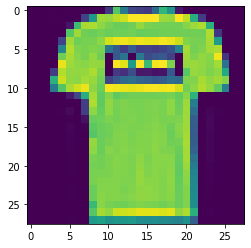

In [6]:
plt.imshow(X_train[1])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [7]:
X_train[5].min()

0

In [8]:
X_train[5].max()

255

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

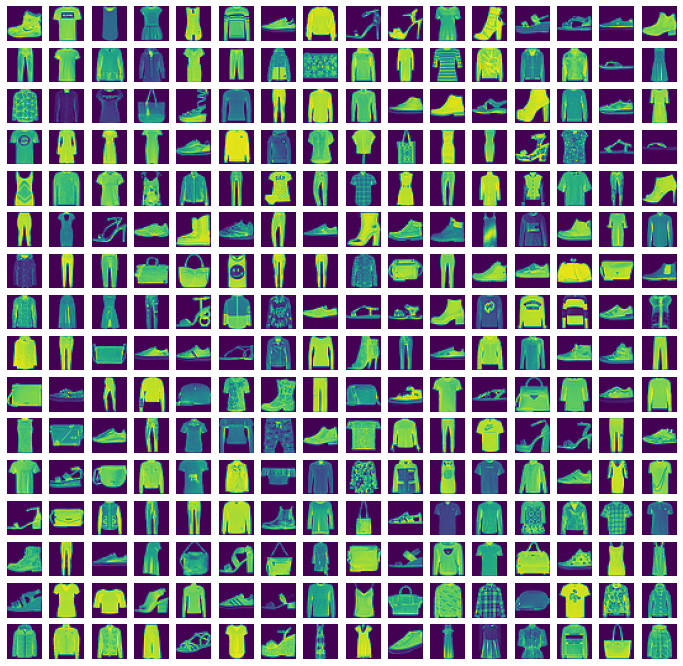

In [10]:
plt.figure(figsize= (12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

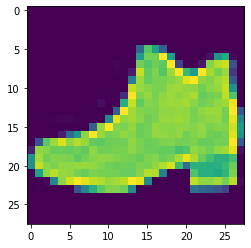

In [11]:
plt.imshow(X_train[15])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5.1: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**



In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_cat_train = to_categorical(y_train)

In [17]:
y_cat_test = to_categorical(y_test)

# Modeling

**TASK 5.2: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout

In [21]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               4480256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                      

# Model Training

TASK 6: Train/Fit the model to the X_train set by using EarlyStop. Amount of epochs is up to you.

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 3)

In [27]:
model.fit(X_train, y = y_cat_train, validation_data=(X_test,y_cat_test), batch_size = 512, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
118/118 [==============================] - 69s 588ms/step - loss: 0.3294 - accuracy: 0.8811 - val_loss: 0.3877 - val_accuracy: 0.8572
Epoch 2/10
118/118 [==============================] - 69s 589ms/step - loss: 0.2860 - accuracy: 0.8978 - val_loss: 0.3396 - val_accuracy: 0.8738
Epoch 3/10
118/118 [==============================] - 69s 582ms/step - loss: 0.2571 - accuracy: 0.9060 - val_loss: 0.3255 - val_accuracy: 0.8766
Epoch 4/10
118/118 [==============================] - 69s 583ms/step - loss: 0.2362 - accuracy: 0.9134 - val_loss: 0.2757 - val_accuracy: 0.8995
Epoch 5/10
118/118 [==============================] - 69s 582ms/step - loss: 0.2183 - accuracy: 0.9202 - val_loss: 0.2673 - val_accuracy: 0.9008
Epoch 6/10
118/118 [==============================] - 69s 584ms/step - loss: 0.2027 - accuracy: 0.9258 - val_loss: 0.2556 - val_accuracy: 0.9092
Epoch 7/10
118/118 [==============================] - 69s 588ms/step - loss: 0.1882 - accuracy: 0.9305 - val_loss: 0.2814 - val_ac

In [28]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.329377,0.881083,0.387694,0.8572
1,0.285980,0.897817,0.339614,0.8738
2,0.257130,0.906000,0.325465,0.8766
3,0.236231,0.913417,0.275748,0.8995
4,0.218277,0.920200,0.267277,0.9008


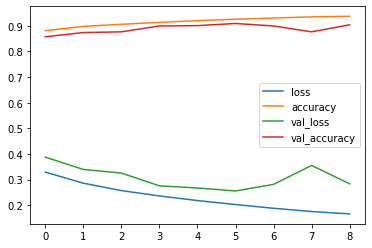

In [29]:
summary.plot();

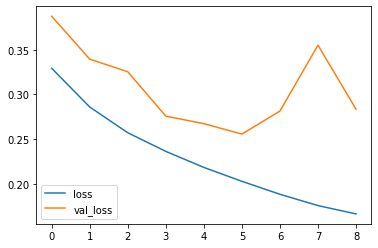

In [30]:
summary[["loss", "val_loss"]].plot();

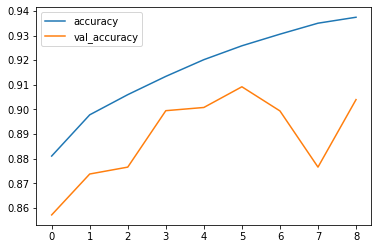

In [31]:
summary[["accuracy", "val_accuracy"]].plot();

TASK 7: Plot values of metrics you used in your model.

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.2835 - accuracy: 0.9040


[0.28349462151527405, 0.9039999842643738]

In [34]:
from sklearn.metrics import classification_report

In [50]:
predictions = model.predict(X_test)
predictions

array([[9.1920060e-07, 5.4293718e-08, 1.9839194e-06, ..., 1.2793442e-03,
        2.5025263e-06, 9.9839312e-01],
       [9.7938960e-07, 2.7631043e-16, 9.9999785e-01, ..., 1.8136449e-15,
        3.5159067e-11, 3.4435693e-16],
       [1.5824265e-08, 1.0000000e+00, 6.1180457e-12, ..., 1.1377043e-16,
        5.1454687e-12, 1.8730770e-15],
       ...,
       [1.1873742e-08, 2.0562955e-12, 2.2523723e-08, ..., 1.1077175e-08,
        9.9999928e-01, 1.0952399e-09],
       [2.1871964e-09, 9.9999988e-01, 6.5605997e-12, ..., 1.2207380e-14,
        5.2771433e-12, 4.4815757e-12],
       [8.1435617e-05, 1.6148258e-06, 3.5758552e-04, ..., 3.9594829e-02,
        1.8730015e-03, 4.1696985e-04]], dtype=float32)

In [51]:
preds=np.argmax(predictions,axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5])

In [52]:
y_cat_test.shape

(10000, 10)

In [53]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [54]:
np.argmax(predictions[0])

9

In [55]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the X_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [56]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.84      0.84      1000
           3       0.94      0.90      0.92      1000
           4       0.73      0.96      0.83      1000
           5       0.98      0.99      0.98      1000
           6       0.84      0.56      0.67      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



# Prediction

In [46]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [72]:
pd.DataFrame.from_records(X_test.squeeze())

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.26666668, 0.36862746, 0.3529412, 0.435...","[0.27450982, 0.6627451, 0.5058824, 0.40784314,...","[0.0627451, 0.49411765, 0.67058825, 0.7372549,...","[0.0, 0.0, 0.0, 0.047058824, 0.2627451, 0.4156...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03137255...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5372549, 0.93...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 1.0, 0.90588236...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.9137255, 0.9450980...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.972549, 0.94509804...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.9411765, 0.90...","[0.0, 0.0, 0.0, 0.0, 0.023529412, 1.0, 0.93333...","[0.0, 0.0, 0.0, 0.0, 0.1254902, 1.0, 0.9254902...","[0.0, 0.0, 0.0, 0.0, 0.20784314, 1.0, 0.925490...",...,"[0.0, 0.0, 0.0, 0.0, 0.8, 0.9529412, 1.0, 0.43...","[0.0, 0.0, 0.0, 0.0, 0.76862746, 0.9411765, 1....","[0.0, 0.0, 0.0, 0.0, 0.7529412, 0.9529412, 1.0...","[0.0, 0.0, 0.0, 0.0, 0.7411765, 0.9843137, 1.0...","[0.0, 0.0, 0.0, 0.0, 0.7176471, 0.9882353, 1.0...","[0.0, 0.0, 0.0, 0.0, 0.69803923, 0.9529412, 1....","[0.0, 0.0, 0.0, 0.0, 0.7372549, 0.9411765, 0.9...","[0.0, 0.0, 0.0, 0.0, 0.50980395, 0.9607843, 0....","[0.0, 0.0, 0.0, 0.0, 0.29803923, 1.0, 0.976470...","[0.0, 0.0, 0.0, 0.0, 0.19215687, 0.8039216, 0...."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0,

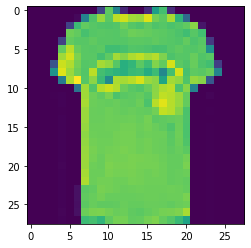

In [63]:
plt.imshow(np.squeeze(X_test[19]))

In [65]:
img=X_test[19]
img.shape

(28, 28, 1)

In [66]:
type(img)

numpy.ndarray

In [67]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [68]:
model.predict(resized_img)

array([[9.94196057e-01, 1.13506459e-07, 4.14864905e-03, 9.53773451e-06,
        6.33040236e-06, 2.34631480e-05, 1.60698348e-03, 9.35428233e-08,
        8.72195324e-06, 1.10856835e-08]], dtype=float32)

In [69]:
np.argmax(model.predict(resized_img))


0